### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read Dataset

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [23]:
data.shape

(333, 15)

### Feature Selection

In [7]:
X = data['rm'].values
y = data['medv'].values

### Data Visualization

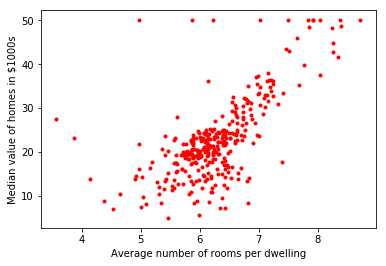

In [9]:
plt.plot(X, y, 'r.')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of homes in $1000s')
plt.show()

In [26]:
X = np.column_stack((np.ones(len(X)), X))
y = y.reshape(-1,  1)
theta = np.random.randn(2,1)

In [27]:
print(X[:5])

[[1.    6.575]
 [1.    6.421]
 [1.    6.998]
 [1.    7.147]
 [1.    6.012]]


In [28]:
print(y[:5])

[[24. ]
 [21.6]
 [33.4]
 [36.2]
 [22.9]]


In [29]:
print(theta)

[[-0.45979006]
 [ 0.03354566]]


### Train-Test split

In [13]:
index = np.arange(len(X))
np.random.shuffle(index)

train_split = int(0.7*len(X))


X_train = X[index[:train_split]]
X_test = X[index[train_split:]]
y_train = y[index[:train_split]]
y_test = y[index[train_split:]]

print("X_train \t: ", X_train.shape)
print("X_test  \t: ", X_test.shape)
print("y_train \t: ", y_train.shape)
print("y_test  \t: ", y_test.shape)

X_train 	:  (233, 2)
X_test  	:  (100, 2)
y_train 	:  (233, 1)
y_test  	:  (100, 1)


### Hypothesis
<img src='../images/hypothesis.png'></img>

In [14]:
def hypothesis(X, theta):
    h = np.dot(X, theta)
    return h

### Cost Function
<img src='../images/cost function.png'></img>

In [10]:
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.mean((h-y)**2) / 2
    return J

In [16]:
def plot_hypothesis(X, y, theta):
    X1 = X[:, 1].reshape(-1, 1)
    plt.plot(X1, y, 'r.')
    plt.plot(X1, hypothesis(X, theta))
    plt.xlabel('Average number of rooms per dwelling')
    plt.ylabel('Median value of homes in $1000s')
    plt.show()

### Gradient Descent
<img src='../images/gradient descent.png'></img>
<img src='../images/gradient descent formula2.png'></img>

In [17]:
def optimize(X, y, theta, lr, n_iter):
    X0 = X[:, 0].reshape(-1, 1)
    X1 = X[:, 1].reshape(-1, 1)
    cost_hist = []
    for i in range(1, n_iter+1):
        h = hypothesis(X, theta)
        theta[0] = theta[0] - lr * np.mean((h - y)*X0)
        theta[1] = theta[1] - lr * np.mean((h - y)*X1)
        
        if(i%50 == 0):
            J = cost(X, y, theta)
            cost_hist.append(J)
            print('\nIteration : ', i, ',\tCost : ', J)
        
    return cost_hist

In [18]:
cost_hist = optimize(X_train, y_train, theta, 0.04, 5000)


Iteration :  50 ,	Cost :  27.751147870598963

Iteration :  100 ,	Cost :  27.17511369163933

Iteration :  150 ,	Cost :  26.628340097640994

Iteration :  200 ,	Cost :  26.109340750008883

Iteration :  250 ,	Cost :  25.616704811113507

Iteration :  300 ,	Cost :  25.149093109097755

Iteration :  350 ,	Cost :  24.70523449749833

Iteration :  400 ,	Cost :  24.283922399786288

Iteration :  450 ,	Cost :  23.884011529432986

Iteration :  500 ,	Cost :  23.5044147765858

Iteration :  550 ,	Cost :  23.144100252889977

Iteration :  600 ,	Cost :  22.802088486423663

Iteration :  650 ,	Cost :  22.47744975912061

Iteration :  700 ,	Cost :  22.169301579442948

Iteration :  750 ,	Cost :  21.876806283433428

Iteration :  800 ,	Cost :  21.599168757626227

Iteration :  850 ,	Cost :  21.335634277626138

Iteration :  900 ,	Cost :  21.085486456480567

Iteration :  950 ,	Cost :  20.848045297267344

Iteration :  1000 ,	Cost :  20.622665344604425

Iteration :  1050 ,	Cost :  20.408733930056684

Iteration :  110

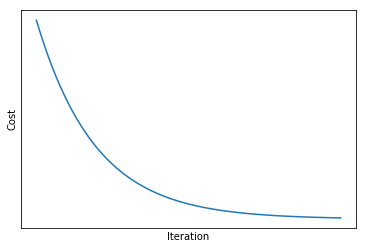

In [19]:
plt.plot(cost_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.xticks([])
plt.yticks([])
plt.show()

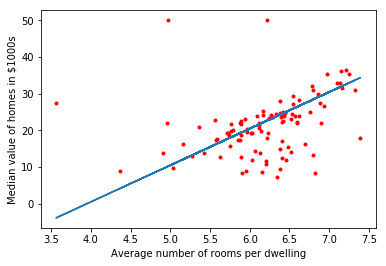

In [20]:
plot_hypothesis(X_test, y_test, theta)